In [1]:
from libs.connector.metatrader.ibovespa_reader import BovespaReader
from libs.analysis.kpis.averages import AverageAnalysis

In [2]:
## connection
# initialize
connector = BovespaReader()
assert connector.bovespa_tickers_df.shape[0] == len(connector.list_bovespa_tickers)

# get stocks data
param_last_days = 90
df_all_stocks = connector.get_bovespa_dataframe(
    connector.list_bovespa_tickers,
    kpi_list = ['close'],
    last_days = param_last_days
)

# assert (param_last_days * len(connector.list_bovespa_tickers)) == df_all_stocks.shape[0]

df_all_stocks.head()

MetaTradar5 loaded!


c:\Users\gussa\OneDrive\Área de Trabalho\mercado_financeiro\libs\connector\metatrader\ibovespa_reader.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.bovespa_tickers_df.drop(


APTI3 does not have recent data - KeyError: 'time'
BAUH3 does not have recent data - KeyError: 'time'
BBML3 does not have recent data - KeyError: 'time'
BRQB3 does not have recent data - KeyError: 'time'
CATA3 does not have recent data - KeyError: 'time'
CATA4 does not have recent data - KeyError: 'time'
CMSA3 does not have recent data - KeyError: 'time'
CMSA4 does not have recent data - KeyError: 'time'
CNSY3 does not have recent data - KeyError: 'time'
CORR3 does not have recent data - KeyError: 'time'
CTCA3 does not have recent data - KeyError: 'time'
DTCY4 does not have recent data - KeyError: 'time'
FLEX3 does not have recent data - KeyError: 'time'
HBTS3 does not have recent data - KeyError: 'time'
HOOT3 does not have recent data - KeyError: 'time'
IGSN3 does not have recent data - KeyError: 'time'
INNT3 does not have recent data - KeyError: 'time'
LMED3 does not have recent data - KeyError: 'time'
MGEL3 does not have recent data - KeyError: 'time'
MMAQ3 does not have recent data

,time,close,stock
0,2023-01-23,21.33,AALR3
1,2023-01-24,21.40,AALR3
2,2023-01-25,21.44,AALR3
3,2023-01-26,21.34,AALR3
4,2023-01-27,21.21,AALR3


In [3]:
analyser = AverageAnalysis(df_all_stocks)
analyser.dataframe.head()




,time,close,stock
0,2023-01-23,21.33,AALR3
1,2023-01-24,21.40,AALR3
2,2023-01-25,21.44,AALR3
3,2023-01-26,21.34,AALR3
4,2023-01-27,21.21,AALR3


In [4]:
analyser.stock_analyser(
    'ITUB4',
    list_moving_average = [9, 21, 50, 200],
    list_exponential_moving_average = [9, 21, 50, 200],
    # kpi_reference: list = ['close']    
)


                    Error in ITUB4 moving average:
                    Doesn't have enough data to calculate kpi: 200.
                    Only 90 records.
                    210 are necessery.
                    KeyError: single positional indexer is out-of-bounds
                

                    Error in ITUB4 exponential moving average:
                    Doesn't have enough data to calculate kpi: 200.
                    Only 90 records.
                    210 are necessery.
                    KeyError: single positional indexer is out-of-bounds
                


,time,close,stock,ma9_close,ma21_close,ma50_close,ema9_close,ema21_close,ema50_close
0,2023-01-23,25.01,ITUB4,NaN,NaN,NaN,25.010000,25.010000,25.010000
1,2023-01-24,25.24,ITUB4,NaN,NaN,NaN,25.056000,25.030909,25.019020
2,2023-01-25,25.33,ITUB4,NaN,NaN,NaN,25.110800,25.058099,25.031215
3,2023-01-26,25.18,ITUB4,NaN,NaN,NaN,25.124640,25.069181,25.037050
4,2023-01-27,24.65,ITUB4,NaN,NaN,NaN,25.029712,25.031074,25.021871
...,...,...,...,...,...,...,...,...,...
85,2023-05-29,26.92,ITUB4,26.856667,26.485714,25.4026,26.833641,26.506613,25.865924
86,2023-05-30,26.54,ITUB4,26.784444,26.515238,25.4576,26.774913,26.509648,25.892359
87,2023-05-31,26.33,ITUB4,26.700000,26.583333,25.5222,26.685930,26.493316,25.909521
88,2023-06-01,26.70,ITUB4,26.681111,26.670952,25.5930,26.688744,26.512106,25.940520


In [ ]:
        # 


        
dataframe = calculate_moving_average(dataframe, list_moving_average)
dataframe = calculate_exponential_moving_average(dataframe, list_moving_average)
dataframe


In [29]:
stock = 'ITUB4'
dataframe = analyser.dataframe[analyser.dataframe['stock']==stock].copy()

list_moving_average = [9, 21, 50, 200]
list_exponential_moving_average = [9, 21, 50, 200]


def check_data_and_params(df, list_kpi:list):
    var_df_size = df.shape[0]
    list_kpi_to_remove = []
    for kpi in list_kpi:
        try:
            kpi = int(kpi)
            var_number_minimum_value = kpi + 10
            dataframe.iloc[var_number_minimum_value]
        except ValueError as error:
            print(
                f"{kpi} is not a type of moving average - KeyError: {error}"
            )
            list_kpi_to_remove.append(kpi)
            pass
        except IndexError as error:
            print(f""" 
                Doesn't have enough data to calculate kpi: {kpi}. 
                Only {var_df_size} records when {var_number_minimum_value} are necessery. 
                KeyError: {error}
                """
            )
            list_kpi_to_remove.append(kpi)
            pass
    list_kpi = [x for x in list_kpi if x not in list_kpi_to_remove]
    return list_kpi


def calculate_moving_average(df, list_moving_average, kpi_reference=['close']):
    list_moving_average = check_data_and_params(df, list_moving_average)
    for type_average in list_moving_average:
        for reference in kpi_reference:
            kpi_name = f'ma{type_average}_{reference}'
            df[kpi_name] = df[reference].rolling(window=type_average).mean()

    return df
    
def calculate_exponential_moving_average(df, list_exponential_moving_average, kpi_reference=['close']):
    list_exponential_moving_average = check_data_and_params(df, list_exponential_moving_average)
    for type_average in list_exponential_moving_average:
        for reference in kpi_reference:
            kpi_name = f'ema{type_average}_{reference}'
            df[kpi_name] = df[reference].ewm(span=type_average, adjust=False).mean()

    return df
        
dataframe = calculate_moving_average(dataframe, list_moving_average)
dataframe = calculate_exponential_moving_average(dataframe, list_moving_average)
dataframe


 
                Doesn't have enough data to calculate kpi: 200. 
                Only 90 records when 210 are necessery. 
                KeyError: single positional indexer is out-of-bounds
                
 
                Doesn't have enough data to calculate kpi: 200. 
                Only 90 records when 210 are necessery. 
                KeyError: single positional indexer is out-of-bounds
                


,time,close,stock,ma9_close,ma21_close,ma50_close,ema9_close,ema21_close,ema50_close
0,2023-01-23,25.01,ITUB4,NaN,NaN,NaN,25.010000,25.010000,25.010000
1,2023-01-24,25.24,ITUB4,NaN,NaN,NaN,25.056000,25.030909,25.019020
2,2023-01-25,25.33,ITUB4,NaN,NaN,NaN,25.110800,25.058099,25.031215
3,2023-01-26,25.18,ITUB4,NaN,NaN,NaN,25.124640,25.069181,25.037050
4,2023-01-27,24.65,ITUB4,NaN,NaN,NaN,25.029712,25.031074,25.021871
...,...,...,...,...,...,...,...,...,...
85,2023-05-29,26.92,ITUB4,26.856667,26.485714,25.4026,26.833641,26.506613,25.865924
86,2023-05-30,26.54,ITUB4,26.784444,26.515238,25.4576,26.774913,26.509648,25.892359
87,2023-05-31,26.33,ITUB4,26.700000,26.583333,25.5222,26.685930,26.493316,25.909521
88,2023-06-01,26.70,ITUB4,26.681111,26.670952,25.5930,26.688744,26.512106,25.940520


# Testing and Develop

In [6]:
## como proteger senhas/autenticações?

There are several techniques you can use to analyze stock prices in Python. Here are some commonly used techniques:

1. Historical Data Analysis:
   - Retrieve historical stock price data using APIs like Alpha Vantage or Yahoo Finance.
   - Perform data preprocessing and cleaning.
   - Calculate various metrics such as moving averages, volatility, returns, and correlations.
   - Visualize the data using plots like line charts, candlestick charts, or OHLC (Open-High-Low-Close) charts.

2. Technical Analysis:
   - Use popular technical indicators like moving averages, Bollinger Bands, Relative Strength Index (RSI), and MACD (Moving Average Convergence Divergence).
   - Plot these indicators on stock price charts to identify trends, reversals, and potential buy/sell signals.
   - Implement trading strategies based on technical analysis rules.

3. Fundamental Analysis:
   - Gather company-specific data such as financial statements (income statement, balance sheet, cash flow statement), earnings reports, and news sentiment.
   - Calculate financial ratios like Price-to-Earnings (P/E) ratio, Price-to-Sales (P/S) ratio, and Return on Equity (ROE).
   - Analyze key performance indicators, growth prospects, and competitive positioning.
   - Combine fundamental analysis with stock price data to make investment decisions.

4. Machine Learning:
   - Apply machine learning algorithms for stock price prediction and forecasting.
   - Use regression models (e.g., linear regression, support vector regression) or time series models (e.g., ARIMA, LSTM) to predict future prices.
   - Train models on historical stock price data and relevant features.
   - Evaluate model performance using metrics like mean squared error (MSE) or mean absolute percentage error (MAPE).

5. Quantitative Analysis:
   - Implement quantitative trading strategies based on statistical models and algorithmic rules.
   - Use techniques like pairs trading, mean reversion, or momentum strategies.
   - Backtest trading strategies on historical data to assess performance.



,time,close,ma9,ema21,diff_ma9,diff_ema21
0,2022-08-09,16.96,NaN,16.960000,NaN,0.000000
1,2022-08-10,17.16,NaN,16.978182,NaN,0.181818
2,2022-08-11,17.05,NaN,16.984711,NaN,0.065289
3,2022-08-12,17.62,NaN,17.042464,NaN,0.577536
4,2022-08-15,17.92,NaN,17.122240,NaN,0.797760
...,...,...,...,...,...,...
195,2023-05-23,17.46,16.940000,16.857807,0.520000,0.602193
196,2023-05-24,17.04,17.000000,16.874370,0.040000,0.165630
197,2023-05-25,17.10,17.080000,16.894882,0.020000,0.205118
198,2023-05-26,17.05,17.156667,16.908983,-0.106667,0.141017


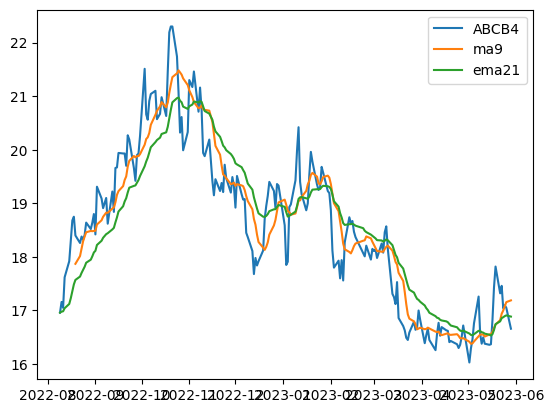

In [4]:
## é possível baixar todos de uma vez?
## paralelis - thread
import matplotlib.pyplot as plt


i = analyser.list_unique_symbols[1]
stock = DataFrameReader()
stock.get_data(i, kpi_list=['close'], last_days=200)
df = stock.df.copy()
df['ma9'] = df['close'].rolling(window=9).mean()
df['ema21'] = df['close'].ewm(span=21, adjust=False).mean()

df['diff_ma9'] = df['close'] - df['ma9']
df['diff_ema21'] = df['close'] - df['ema21']

plt.plot(df.time, df['close'], label=i)
plt.plot(df.time, df['ma9'], label='ma9')
plt.plot(df.time, df['ema21'], label='ema21')
plt.legend()
df




In [28]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd

data = []
for i in list_of_symbols:
    stock = DataFrameReader()
    try:
        stock.get_data(i, kpi_list=['close'], last_days=50)
    except:
        continue

    df = stock.df.copy()

    # IQR
    q25 = df['close'].quantile(.25)
    q75 = df['close'].quantile(.75)
    diff_q = q75 - q25
    df['outlier'] = 0
    df.loc[
        (df['close']>(q75+1.5*diff_q)) |
        (df['close']<(q25-1.5*diff_q)),
        'outlier'
    ] = 1
    # print(df['outlier'].value_counts(dropna=False))
    df = df[df['outlier']==0]
    if df.shape[0]==0:
        continue
    del df['outlier']
    df.reset_index(drop=True, inplace=True)

    scaler = StandardScaler()
    reshape_data = df['close'].values.reshape(-1, 1)
    scaled_data = scaler.fit_transform(reshape_data)
    flatten_data = scaled_data.flatten()
    df['close'] = flatten_data

    X = sm.add_constant(df.index)
    model = sm.OLS(df['close'], X).fit()
    slope = model.params[1]
    p_value = model.pvalues[1]

    # Print the slope and p-value
    values = [i, slope, p_value]
    # df_output.loc[len(df_output.columns)] = values

    data.append(values)

    df['predict'] = model.predict(X)

df_output = pd.DataFrame(data, columns=['stock', 'slope', 'pvalue'])
df_output['pvalue_ok'] = 0
df_output.loc[df_output['pvalue']<0.05, 'pvalue_ok'] = 1

df_output = df_output.sort_values('slope', ascending=False)
print(df_output['pvalue_ok'].value_counts(dropna=False))
df_output = df_output[df_output['pvalue_ok']==1]
df_output.drop(['pvalue_ok', 'pvalue'], axis=1, inplace=True)
df_output


MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!
MetaTradar5 loaded!


,stock,slope
125,HBSA3,0.068035
317,CSUD3,0.067656
200,RADL3,0.067045
288,DEXP3,0.066952
227,SMTO3,0.066753
...,...,...
17,ASAI3,-0.065454
109,FRIO3,-0.065671
68,CRDE3,-0.065973
295,AGXY3,-0.066215


In [29]:
import numpy as np
df_output['slope'].describe(percentiles=np.arange(0.2, 0.25000001, 0.005))
df_output['slope'].describe(percentiles=np.arange(0, 1.00001, 0.05))

count    247.000000
mean       0.026009
std        0.044144
min       -0.066618
0%        -0.066618
5%        -0.060335
10%       -0.054432
15%       -0.039752
20%       -0.030290
25%       -0.020439
30%        0.025882
35%        0.033395
40%        0.038491
45%        0.042536
50%        0.046208
55%        0.048946
60%        0.051834
65%        0.054745
70%        0.057277
75%        0.059164
80%        0.060516
85%        0.062353
90%        0.063737
95%        0.065087
100%       0.068035
max        0.068035
Name: slope, dtype: float64

In [30]:
df_output['trend'] = 'up'
df_output.loc[df_output['slope']<0, 'trend'] = 'down'
df_output.loc[
    (df_output['slope']<=0.1) &
    (df_output['slope']>=-0.1),
    'trend'
] = 'neutral'

df_output['trend'].value_counts(dropna=False)

trend
neutral    247
Name: count, dtype: int64

In [34]:
df_output
df_output[df_output['slope']<=0.02]

,stock,slope,trend
302,LAND3,0.019994,neutral
315,AURE3,-0.019628,neutral
269,USIM3,-0.021250,neutral
49,BSLI3,-0.021318,neutral
124,HBRE3,-0.022161,neutral
...,...,...,...
17,ASAI3,-0.065454,neutral
109,FRIO3,-0.065671,neutral
68,CRDE3,-0.065973,neutral
295,AGXY3,-0.066215,neutral


In [35]:
stock = DataFrameReader()
stock.get_data('LAND3', kpi_list=['close'], last_days=20)
stock.df.head()

MetaTradar5 loaded!


,time,close
0,2023-04-28,28.10
1,2023-05-02,28.00
2,2023-05-03,28.37
3,2023-05-04,29.00
4,2023-05-05,29.00


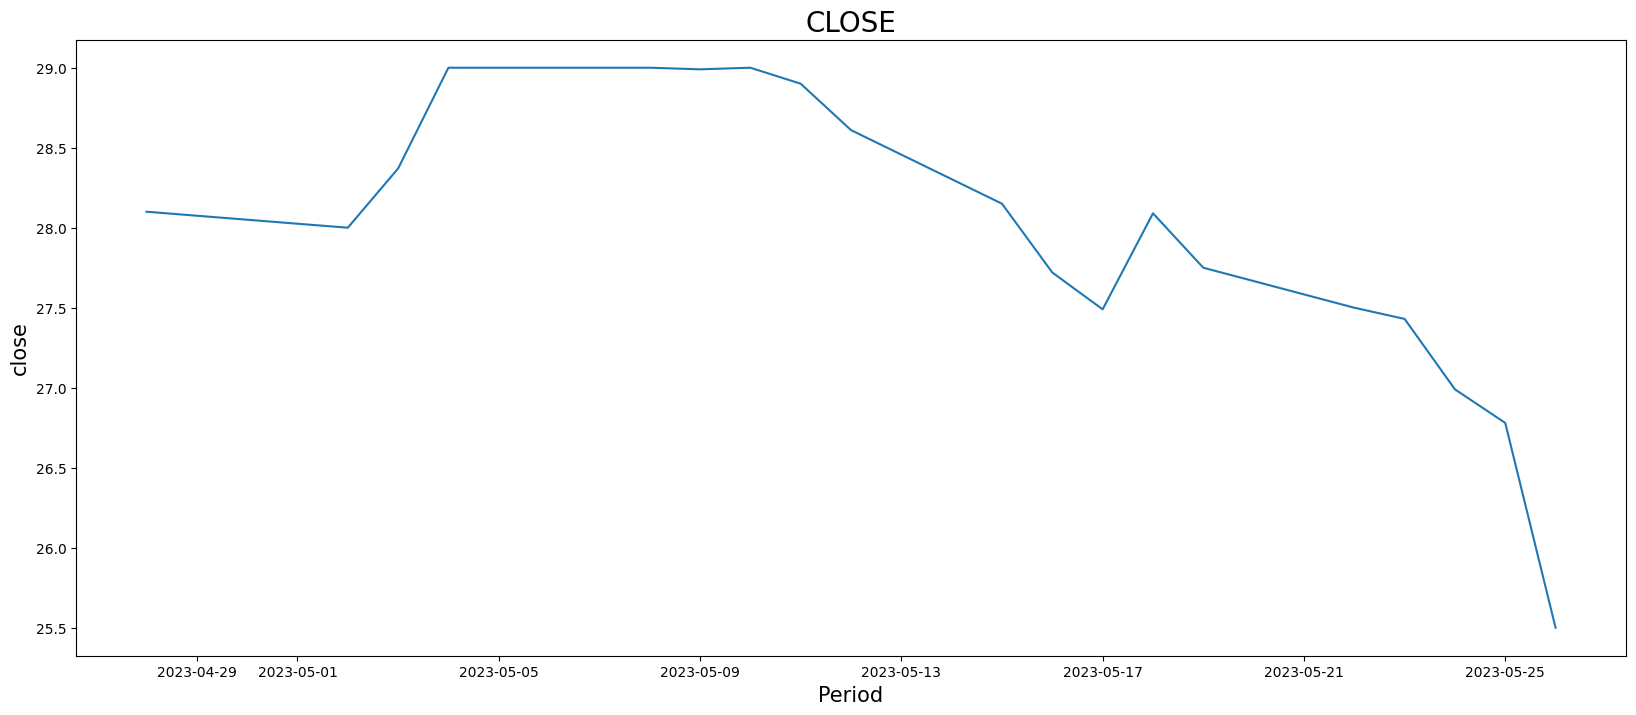

In [36]:
plot = Ploter(stock.df)
plot.symbol_lineplot(y_axis='close', x_axis='time')

In [75]:

from sklearn.preprocessing import StandardScaler
df = stock.df.copy()

# IQR
q25 = df['close'].quantile(.25)
q75 = df['close'].quantile(.75)
diff_q = q75 - q25
df['outlier'] = 0
df.loc[
    (df['close']>(q75+1.5*diff_q)) |
    (df['close']<(q25-1.5*diff_q)),
    'outlier'
] = 1
print(df['outlier'].value_counts(dropna=False))
df = df[df['outlier']==0]
del df['outlier']
df.reset_index(drop=True, inplace=True)


outlier
0    19
1     1
Name: count, dtype: int64


In [76]:
scaler = StandardScaler()
reshape_data = df['close'].values.reshape(-1, 1)
scaled_data = scaler.fit_transform(reshape_data)
flatten_data = scaled_data.flatten()
df['close'] = flatten_data

Slope: -0.006462324899949372
P-value: 0.8856142688586892


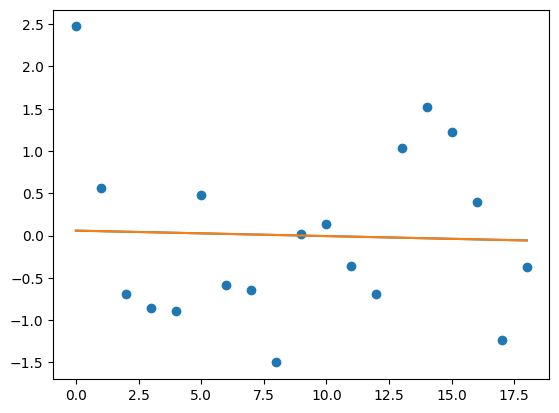

In [77]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = sm.add_constant(df['close'])
X = sm.add_constant(df.index)
model = sm.OLS(df['close'], X).fit()

# Get the slope (coefficient) and p-value
slope = model.params[1]
p_value = model.pvalues[1]

# Print the slope and p-value
print("Slope:", slope)
print("P-value:", p_value)

df['predict'] = model.predict(X)
df['predict'].plot()


plt.scatter(df.index, df['close'], label='Original Data')
plt.plot(df.index, df['predict'], label='Predicted Data')


In [10]:
import MetaTrader5 as mt5
import pandas as pd

if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()

symbols = mt5.symbols_get()

# data in pandas dataframe
symbols = pd.DataFrame(
    symbols,
    columns=symbols[0]._asdict().keys()
)
symbols = symbols[['name', 'path', 'description']]
symbols[
    ['stock_exchange', 'kpi_type']
] = symbols['path'].str.split("\\", expand=True).loc[:, 0:1]
del symbols['path']
symbols    

# bovespa_df = symbols
# mask_bovespa = bovespa_df['stock_exchange'] == 'BOVESPA'
# mask_avista = bovespa_df['kpi_type'] == 'A VISTA'
# bovespa_df = bovespa_df[
#     mask_bovespa | mask_avista
# ]
# bovespa_df.drop(
#     ['stock_exchange', 'kpi_type'],
#     axis=1,
#     inplace=True)
# bovespa_df


# mask_length = bovespa_df['name'].str.len() == 5
# mask_ends_with = bovespa_df['name'].str[-1].isin(['3', '4'])
# bovespa_df = bovespa_df[
#     mask_length | mask_ends_with
# ]
# list_bovespa_tickers = bovespa_df.name.to_list()
# list_bovespa_tickers

stocks_df = mt5.copy_rates_from_pos(
    'APTI3',
    mt5.TIMEFRAME_D1,
    0,
    900
)

stocks_df

In [8]:
try:
    mt5.copy_rates_from_pos(
        'APTI3',
        mt5.TIMEFRAME_D1,
        0,
        1
    )
    1/0
    stocks_df = pd.DataFrame(stocks_df)
    stocks_df['time'] = pd.to_datetime(
        stocks_df['time'],
        unit='s'
    )
except KeyError as e:
    print('gu')


ZeroDivisionError: division by zero

In [3]:
stocks_df

In [12]:
mt5.copy_rates_from_pos(['ITUB4', 'ABEV3'], mt5.TIMEFRAME_D1, 0, 100)

In [20]:
def resume_table(df):
    print('Dimensões dataframe:', df.shape )
    df.reset_index(drop=True, inplace=True)
    df_aux = pd.DataFrame(index=df.columns)
    df_aux['tipo']     = df.dtypes
    df_aux['%_NaN']    =  round(100*df.isna().sum() / df.shape[0],2)
    df_aux['uniques']  = df.nunique()
    return df_aux

# Engineering

In [31]:
# temporais
df['mes_ano'] = df['time'].dt.to_period('M')
df['mes']     = df['time'].dt.month
df['ano']     = df['time'].dt.year

# variação
df['variacao'] = round(100*(df['close'] / df['open'] - 1),4)

# rendimento ultimos 12 meses
df['rend_ult_12_meses'] = df['variacao'].rolling(12).sum()

# eleicao
df['eleicao'] = 0
df.loc[df['mes_ano'].astype(str).isin(['2010-10','2010-11','2014-10','2014-11','2018-10','2018-11']),'eleicao']=1

df.head()

,time,open,high,low,close,tick_volume,spread,real_volume,mes_ano,mes,ano,variacao,rend_ult_12_meses,eleicao
0,2007-12-01,63101.0,64584.0,63101.0,63886.0,192835,0,9669674480,2007-12,12,2007,1.2440,NaN,0
1,2008-01-01,63885.0,63906.0,53011.0,59490.0,2317266,0,93830767349,2008-01,1,2008,-6.8795,NaN,0
2,2008-02-01,59491.0,66005.0,58030.0,63489.0,2168925,0,84533914034,2008-02,2,2008,6.7203,NaN,0
3,2008-03-01,63496.0,65045.0,57824.0,60972.0,2372149,0,85301472838,2008-03,3,2008,-3.9751,NaN,0
4,2008-04-01,60965.0,68038.0,60965.0,67869.0,2203230,0,89325308691,2008-04,4,2008,11.3245,NaN,0


# Analysis

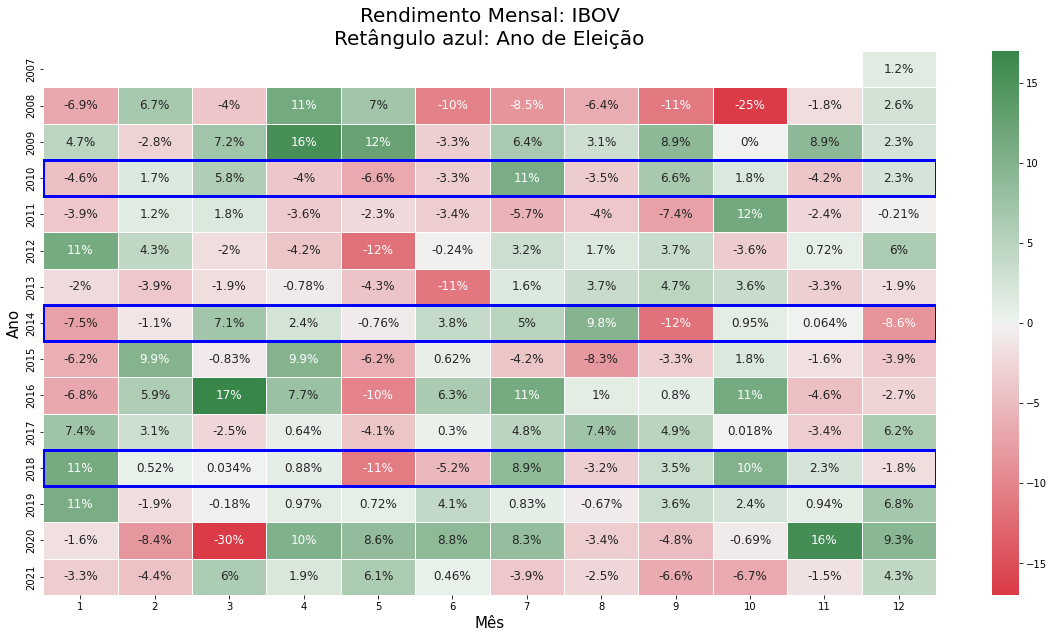

In [32]:
from matplotlib.patches import Rectangle

# setup
cols = 1
rows = 1
figsize = (20,10)

# data
df_graf = df[['mes','ano','variacao']].copy()
df_graf = df_graf.pivot('ano','mes', 'variacao')
df_graf

# plot
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(rows, cols, figsize=figsize)

# cmap='coolwarm'
# cmap = sns.diverging_palette(133, 10, as_cmap=True)
cmap = sns.diverging_palette(10, 133, as_cmap=True)

ax = sns.heatmap(df_graf, linewidth=0.5, annot=True, cmap=cmap, 
                 vmin=-max(df_graf.max().max(),df_graf.min().min()), 
                 vmax= max(df_graf.max().max(),df_graf.min().min()),
                 center=0.0, annot_kws={"fontsize":12})


ax.add_patch(Rectangle((0, 3), 12, 1, fill=False, edgecolor='blue', lw=3))
ax.add_patch(Rectangle((0, 7), 12, 1, fill=False, edgecolor='blue', lw=3))
ax.add_patch(Rectangle((0, 11), 12, 1, fill=False, edgecolor='blue', lw=3))
ax.set(xlabel='Mês',ylabel='Ano')
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.title('Rendimento Mensal: ' + ativo +'\nRetângulo azul: Ano de Eleição')
plt.show()

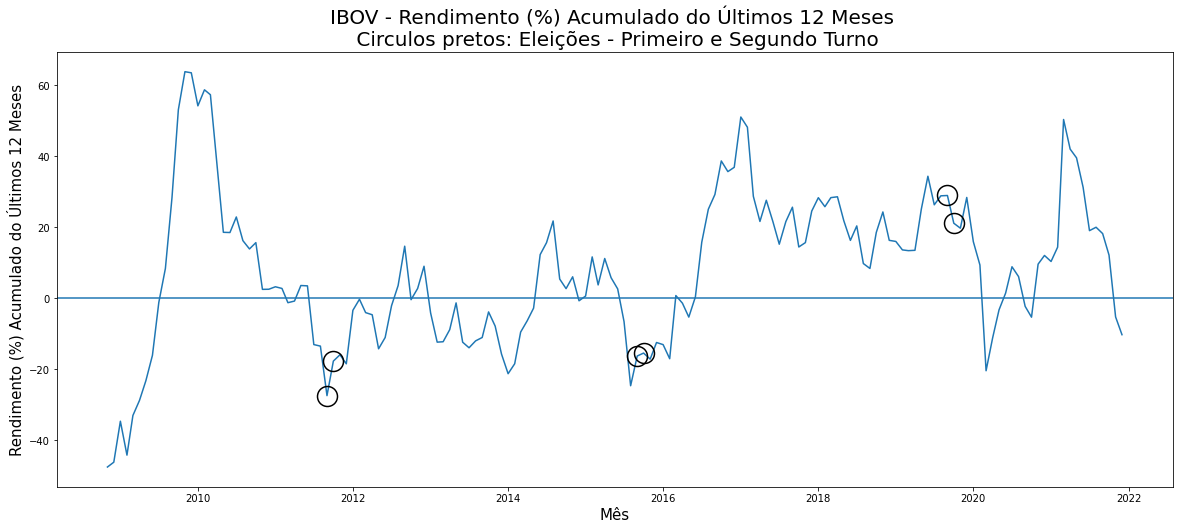

In [38]:
# setup
cols = 1
rows = 1
figsize = (20,8)

# data
df_graf = df[['time','rend_ult_12_meses','eleicao']].copy()
markers = df_graf[df_graf['eleicao']==1].index.to_list()

# plot
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig, ax = plt.subplots(rows, cols, figsize=figsize)

# cmap='coolwarm'
# cmap = sns.diverging_palette(133, 10, as_cmap=True)
cmap = sns.diverging_palette(10, 133, as_cmap=True)

ax = sns.lineplot(x='time', y='rend_ult_12_meses', data=df_graf, 
                  marker = 'o', markersize=20, fillstyle='none', markeredgewidth=1.5, markeredgecolor='black', markevery=markers)

ax.set(xlabel='Mês',ylabel='Rendimento (%) Acumulado do Últimos 12 Meses')
ax.axhline(0)
for t in ax.texts: t.set_text(t.get_text() + "%")
plt.title(ativo + ' - Rendimento (%) Acumulado do Últimos 12 Meses \n Circulos pretos: Eleições - Primeiro e Segundo Turno')
plt.show()